In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

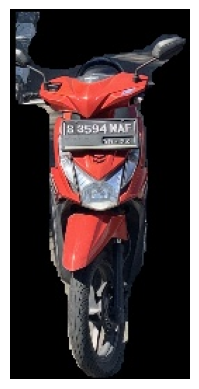

In [57]:
image = cv2.imread('res/terang/mati/189-0.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Menghilangkan sumbu koordinat
plt.show()

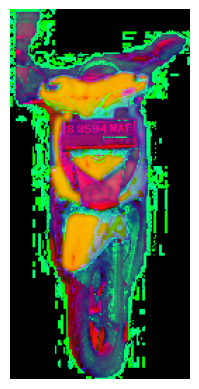

In [58]:
# Ubah citra menjadi ruang warna HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Menghilangkan sumbu koordinat
plt.show()

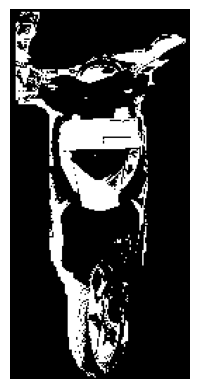

In [59]:
# Tentukan rentang warna putih dalam HSV
lower_white = np.array([0, 0, 50])
upper_white = np.array([255, 75, 255])

# Buat mask dengan rentang warna putih
mask = cv2.inRange(hsv_image, lower_white, upper_white)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Menghilangkan sumbu koordinat
plt.show()

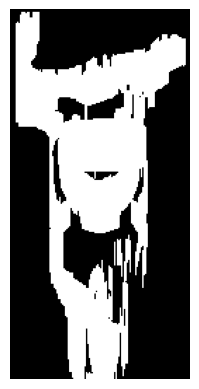

In [63]:
dilation = cv2.dilate(mask, (11,11), iterations = 16)
plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

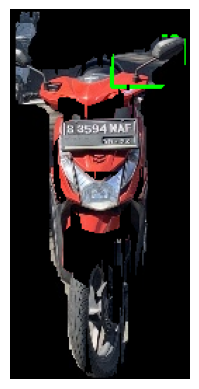

In [64]:
# Aplikasikan mask ke citra asli
result = cv2.bitwise_and(image, image, mask=dilation)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Menghilangkan sumbu koordinat
plt.show()

num 0 x:72 y:18 w:53 h:37 area:467.5 ratio:0.6981132075471698


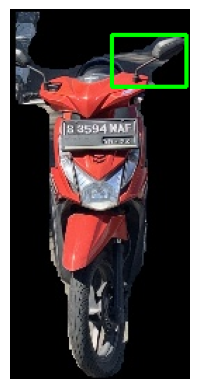

In [65]:
# Temukan kontur pada gambar hasil
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
count = 0 

# Gambar kotak pada setiap kontur
for contour in contours:
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    if area > 400 and area < 1000:
        print(f"num {count} x:{x} y:{y} w:{w} h:{h} area:{area} ratio:{h/w}")
        cv2.rectangle(image,(x,y),(x+w , y+h),(0,255,0),2)
        count += 1
    # print(contour)
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Menghilangkan sumbu koordinat
plt.show()